# Documentation for the loop code

This notebook document the structure of the loop.py that makes the chi square calculation between the synthetic Stokes V profiles and a pyRaven observation packet, for a grid of magnetic dipole parameter values. 

## 0. Importing the necessary packages

In [1]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt

import pyRaven as rav

loading specpolFlow package


## 1. Code structure

Insert text here

## 2. Test of the code (and later on, a demo)

Importing a test pyRaven data packet that contains $n$ LSD profiles that have been scaled, normalized, and cut to include only the portion of the line profile that will be used for the calculation of the chi square

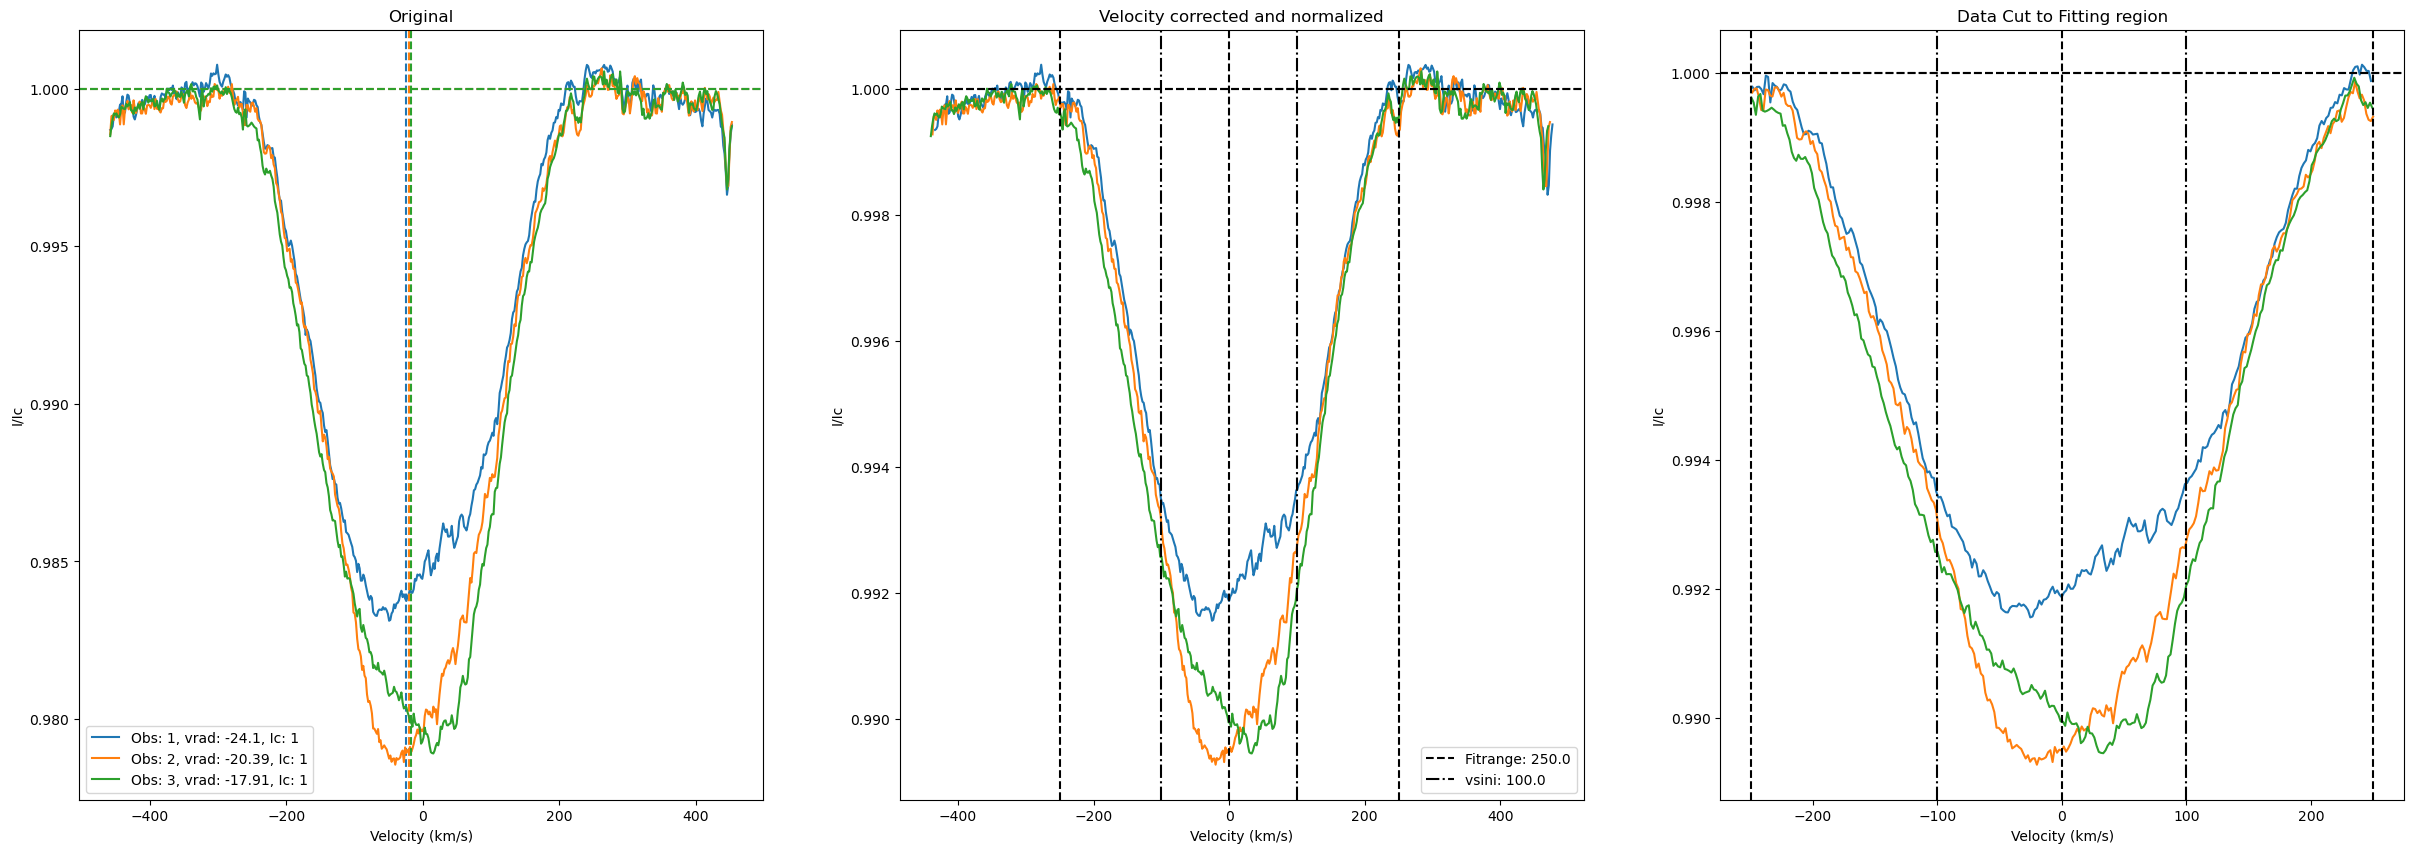

In [2]:
Packet = rav.data.read_packet('ExampleData/ExamplePacket.h5')
fig, ax = Packet.plotI()

We are here generating the data structures that contains information for the codes:
* genparam: general parameters, same as for diskint2 function. However the Bpole, incl, beta, and phase parameters are not necessary here, as they will be set by the gridparam structure. This said, one can still pass a genparam structure that was used for diskint2 -- the extra parameters are simply ignored. 
* weakparam: the lande factor for the weak field approximation
* gridparam: contains the arrays defining the grid for the dipolar parameters. 

See INSERT LINK HERE for many additional way to create param objects (including from files). 

Here we have set the intensity line profile model parameters to already known values for this dataset. In the middle plot below, we show the model line profile (dashed curve) in the middle panel. 

If you have yet to fit your line profiles to determine the appropriate vsini, vmac, and logkappa, see INSERT LINK HERE.

We also save the the param to a folder in the repository ExampleData/LoopExample. Although not strickly necessary, it will be useful to make more lengtly calculations with a script on a more powerful computer. 

1.958617462625618
Using 9000.0 grid point on the surface
Evaluating with weak approximation...


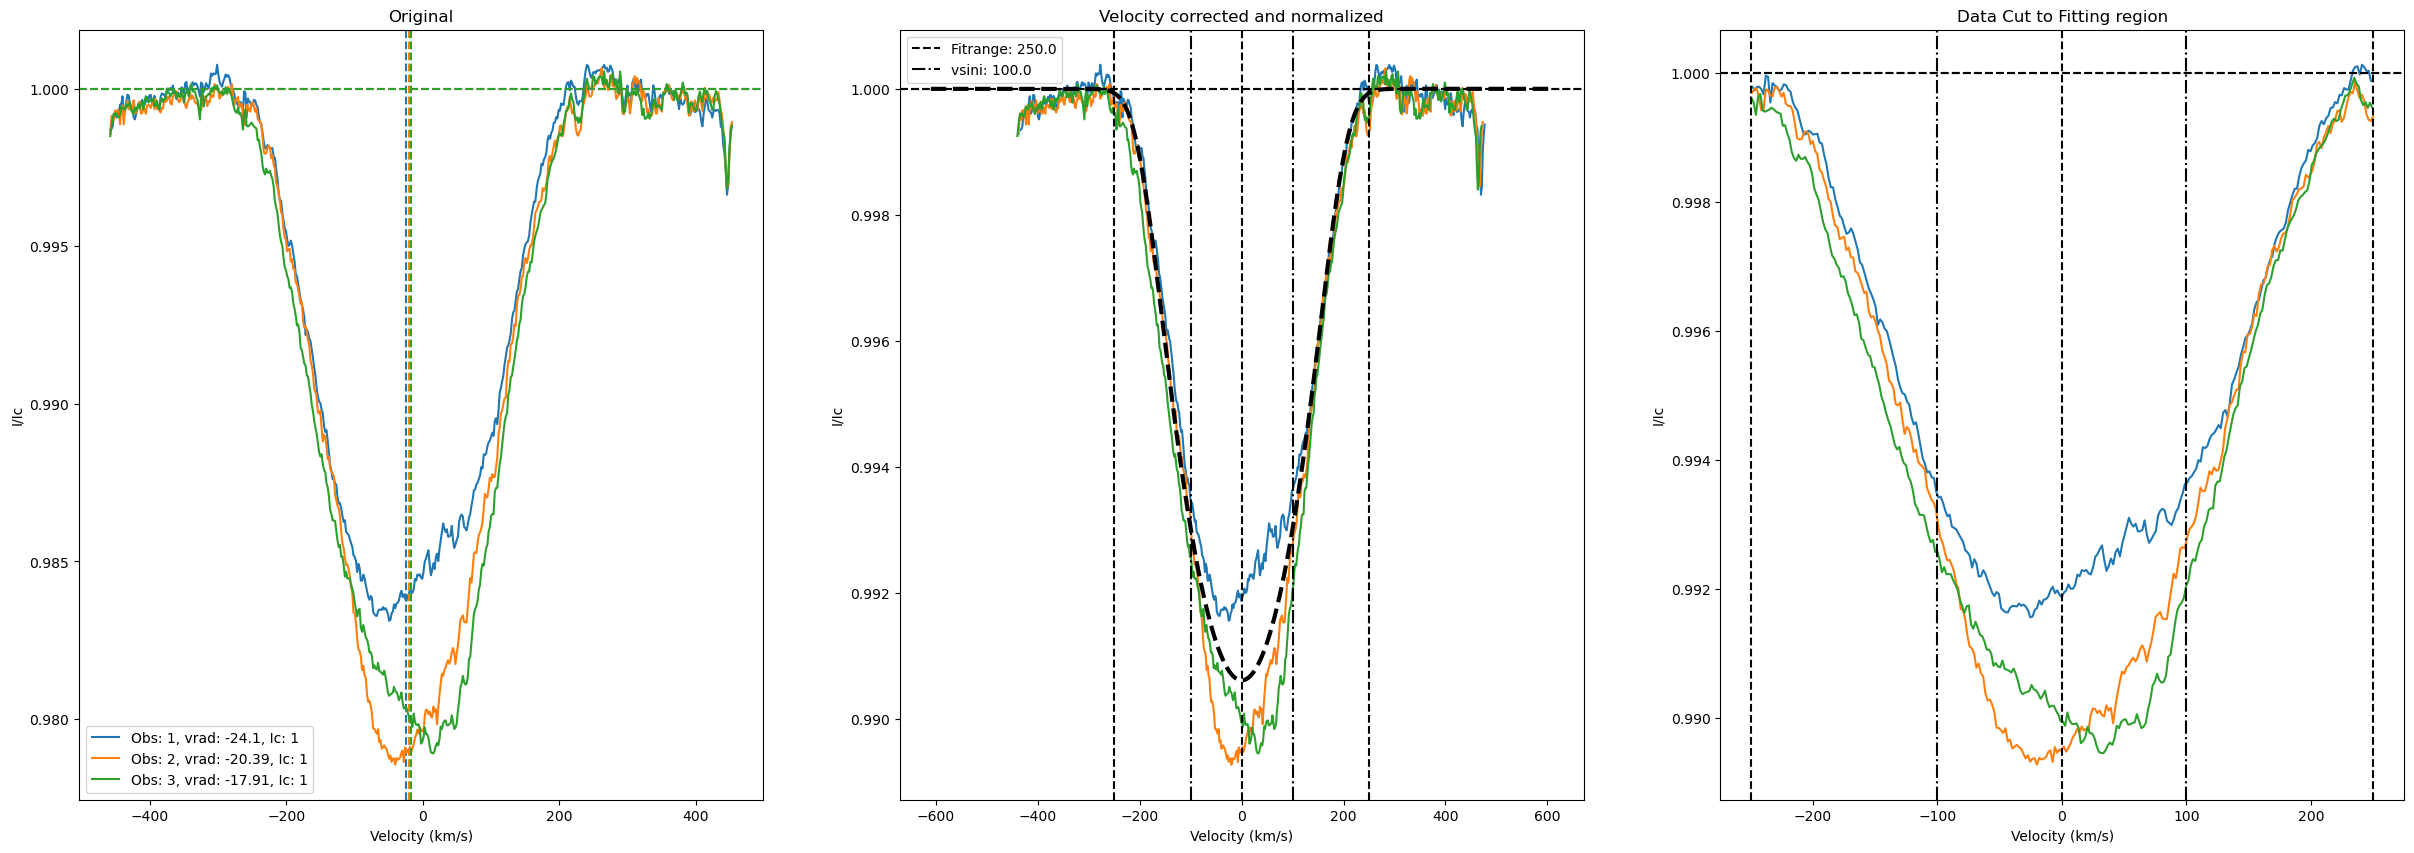

In [3]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':200.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':-0.20,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
    'res':65000,
    'vmac':30,
    'Bpole':1000, #not necessary for loop
    'incl':30., #not necessary for loop
    'beta':30, #not necessary for loop
    'phase':90. #not necessary for loop
  }

weakparam = {
        'geff':1.0
    }

gridparam = {
        #'Bpole_grid': np.array([1000, 2000]),
        #'incl_grid': np.array([30,60]),
        #'beta_grid':np.array([30,60]),
        #'phase_grid':np.array([30,60])
        'Bpole_grid': np.linspace(0,5000,25),
        'incl_grid': np.linspace(0,180,18),
        'beta_grid': np.linspace(0,180,18),
        'phase_grid': np.linspace(0,360,18*2)
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam
       }

rav.params.parameters(param).write('ExampleData/LoopExample/param.json')

model = rav.diskint2.numerical(param)
fig, ax = Packet.plotI()
ax[1].plot(model['vel'], model['flux'], c='k', ls='--', lw=3)

So now, we have everything needed to run the loop, and it could be done with simply running

```
rav.loop_speed.loop_speed(param, Packet, path='ExampleData/LoopOutputs/')
```

However, this can be a bit slow in a Jupyter notebook. Therefore it might be advantageous to run the loop on e.g. a cluster (TRY THE SPEED ON COLLAB?). 

To do this, we can use the script wrapper 

In a folder (outside of this repository, because the size of the created data is too large for github), I have:
- DataPacket.h5
- Params.json

From this folder, I open python (and a screen instance in the terminal beforehand) and run

````
rav.loop_speed.loop_speed_wrapper('param.json', 'ExamplePacket.h5')
````



## Testing numba for speed

In [3]:
specSigV = [Packet.cutfit.lsds[x].specSigV for x in range(0,Packet.nobs)]


In [43]:
from numba.typed import List

specV = [Packet.cutfit.lsds[x].specV for x in range(0,Packet.nobs)]
#specV = [1,2,3]
typed_specV = List()
for x in specV: typed_specV.append(x)
#typed_specV = [typed_specV.append(x) for x in specV]
#typed_specV.append(5)
#typed_specV.append(6)

In [44]:
typed_specV

ListType[array(float64, 1d, C)]([[-7.0879750e-06  4.9246705e-05  4.0294135e-05  6.5570600e-05
 -2.8529650e-05 -4.8545215e-06 -4.3410790e-05 -6.2453150e-05
  1.2242070e-05 -7.9020500e-06 -1.8947515e-05  1.5739115e-05
 -1.7739055e-06 -2.7966875e-05 -1.0696445e-05 -5.1117650e-06
  4.8244520e-05  1.1469800e-05 -3.7814020e-07 -9.1614400e-06
 -2.4502585e-06 -3.8458480e-05  1.2043105e-05 -2.9018015e-05
  2.8250815e-05 -4.1572055e-05 -3.8426925e-05 -4.8969040e-05
 -1.5883060e-05  4.1190120e-05  2.2752250e-05  5.2410600e-05
  5.9434850e-05 -2.2126155e-05 -4.1107625e-05  4.7150005e-05
  2.4096885e-05  3.0138515e-05 -1.3931155e-05  1.2793430e-05
 -3.5649415e-06 -3.8625710e-05  8.9959200e-06 -2.2947500e-05
 -1.6096520e-05  5.1685500e-05  2.8036040e-06  1.9487245e-06
 -1.1770995e-05 -7.7295550e-05 -2.7150835e-05  3.8655750e-05
  2.3079130e-05 -1.0904940e-05 -1.4837510e-05 -1.5716930e-05
 -3.4417100e-05 -3.1069265e-05 -2.4784035e-05  3.4027995e-05
  7.2773950e-05 -6.7165450e-06  1.3742140e-05  1.663